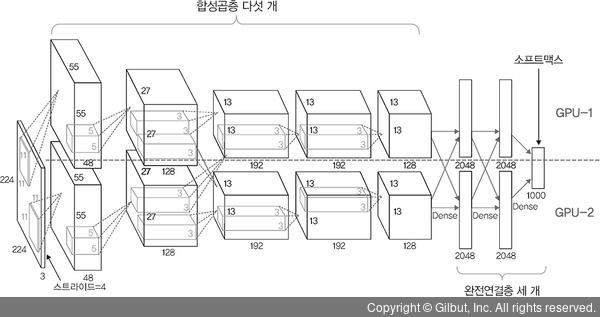
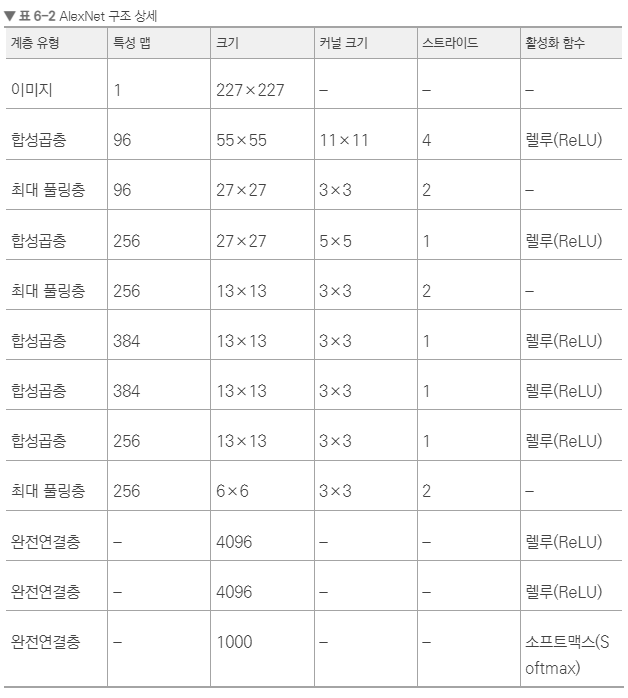

In [1]:
# 코드 6-8 필요한 라이브러리 호출
%load_ext tensorboard

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

2024-12-03 01:28:27.851477: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 01:28:27.853560: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 01:28:27.859615: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733156907.869134   99086 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733156907.872168   99086 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 01:28:27.883241: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# 코드 6-9 모델 생성
# 개와 고양이 두 가지에 대해 분류
num_classes = 2


class AlexNet(Sequential):
    """
    AlexNet 모델 클래스.
    Parameters
    ----------
    input_shape : tuple
        입력 데이터의 형태. 예: (224, 224, 3)
    num_classes : int
        분류할 클래스의 수.
    Methods
    -------
    __init__(self, input_shape, num_classes)
        클래스 초기화 메서드. AlexNet 모델을 구성하고 컴파일합니다.
    Example
    -------
    >>> model = AlexNet(input_shape=(224, 224, 3), num_classes=1000)
    >>> model.summary()
    """

    def __init__(self, input_shape, num_classes):
        super().__init__()
        self.add(
            Conv2D(
                96,
                kernel_size=(11, 11),
                strides=4,
                padding="valid",
                activation="relu",
                input_shape=input_shape,
                kernel_initializer="he_normal",
            )
        )
        self.add(
            MaxPooling2D(
                pool_size=(3, 3),
                strides=(2, 2),
                padding="valid",
                data_format="channels_last",
            )
        )

        self.add(
            Conv2D(
                256,
                kernel_size=(5, 5),
                strides=1,
                padding="same",
                activation="relu",
                kernel_initializer="he_normal",
            )
        )
        self.add(
            MaxPooling2D(
                pool_size=(3, 3),
                strides=(2, 2),
                padding="valid",
                data_format="channels_last",
            )
        )

        self.add(
            Conv2D(
                384,
                kernel_size=(3, 3),
                strides=1,
                padding="same",
                activation="relu",
                kernel_initializer="he_normal",
            )
        )

        self.add(
            Conv2D(
                384,
                kernel_size=(3, 3),
                strides=1,
                padding="same",
                activation="relu",
                kernel_initializer="he_normal",
            )
        )

        self.add(
            Conv2D(
                256,
                kernel_size=(3, 3),
                strides=1,
                padding="same",
                activation="relu",
                kernel_initializer="he_normal",
            )
        )

        self.add(
            MaxPooling2D(
                pool_size=(3, 3),
                strides=(2, 2),
                padding="valid",
                data_format="channels_last",
            )
        )

        self.add(Flatten())
        self.add(Dense(4096, activation="relu"))
        self.add(Dense(4096, activation="relu"))
        self.add(Dense(1000, activation="relu"))
        self.add(Dense(num_classes, activation="softmax"))

        self.compile(
            optimizer=tf.keras.optimizers.Adam(0.001),
            loss="categorical_crossentropy",
            metrics=["accuracy"],
        )

In [3]:
# 코드 6-10 모델 생성
model = AlexNet((100, 100, 3), num_classes)
model.summary()

/home/halozhan/Study/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1733156920.407273   99086 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "alex_net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 23, 23, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         2,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,825,914 (109.96 MB)

 Trainable params: 28,825,914 (109.96 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 코드 6-11 데이터 호출 및 데이터셋 전처리(증가)
EPOCHS = 100
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = "../chap6/data/catanddog/train/"
valid_dir = "../chap6/data/catanddog/validation/"

train = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
)

train_generator = train.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    seed=1,
    shuffle=True,
    class_mode="categorical",
)

valid = ImageDataGenerator(rescale=1.0 / 255)
valid_generator = valid.flow_from_directory(
    valid_dir,
    target_size=(image_height, image_width),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    seed=7,
    shuffle=True,
    class_mode="categorical",
)

train_num = train_generator.samples
valid_num = valid_generator.samples

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [6]:
# 코드 6-12 텐서보드 설정 및 모델 훈련
log_dir = "../chap6/img/log6-2/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1, profile_batch=0
)

model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=train_num // BATCH_SIZE,
    validation_data=valid_generator,
    validation_steps=valid_num // BATCH_SIZE,
    callbacks=[tensorboard_callback],
    verbose=1,
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 378ms/step - accuracy: 0.5823 - loss: 0.6920 - val_accuracy: 0.6250 - val_loss: 0.6922
Epoch 2/100
 1/12 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - accuracy: 0.3750 - loss: 0.6941

/home/halozhan/Study/.venv/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.3750 - loss: 0.6941 - val_accuracy: 0.4583 - val_loss: 0.6923
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 307ms/step - accuracy: 0.4784 - loss: 0.6949 - val_accuracy: 0.4896 - val_loss: 0.7148
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.5625 - loss: 0.6757 - val_accuracy: 0.5000 - val_loss: 0.6965
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 329ms/step - accuracy: 0.5241 - loss: 0.6893 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.0000e+00 - loss: 0.7581 - val_accuracy: 0.5000 - val_loss: 0.6923
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 349ms/step - accuracy: 0.4978 - loss: 0.6936 - val_accuracy: 0.5104 - val_loss: 0.6926
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.6562 - loss: 0.6890 - val_accuracy: 0.4896 - val_loss: 0.6932
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 333ms/step - accuracy: 0.5284 - loss: 0.6918 - val_accuracy: 0.

tensorboard --logdir=/home/halozhan/Study/chap6/img/log6-2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


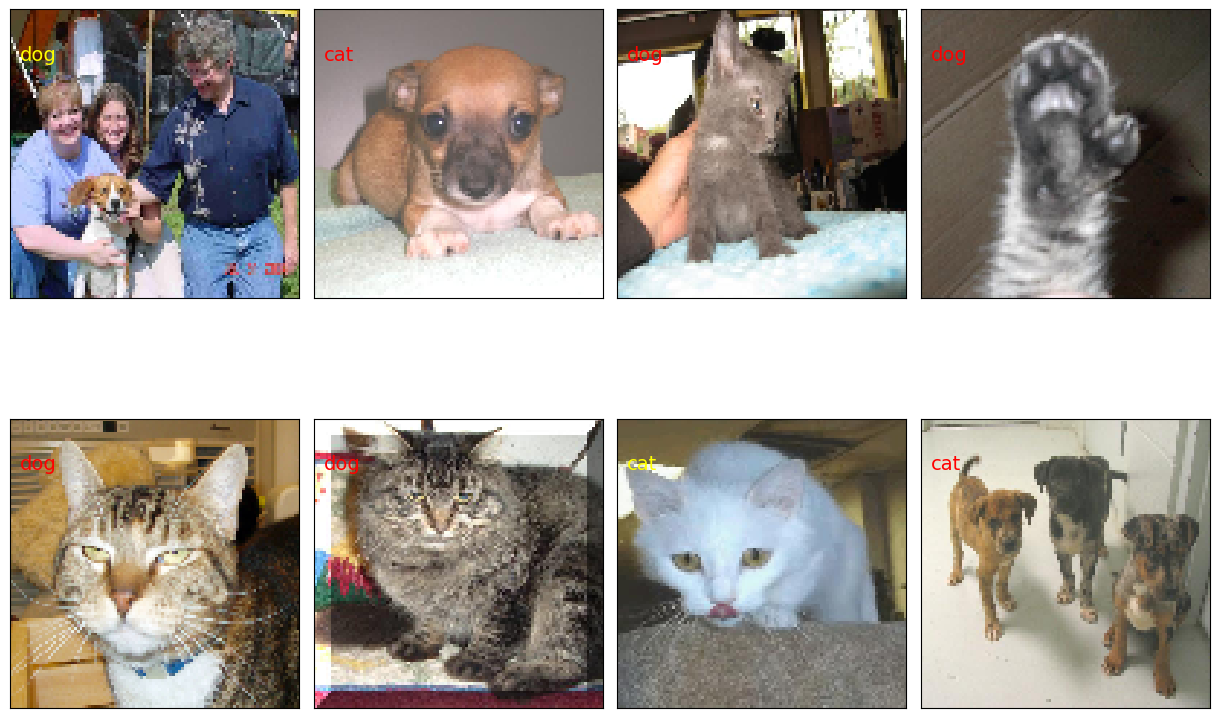

In [7]:
# 코드 6-13 분류에 대한 예측
# 이미지를 개와 고양이 클래스 두 개로 분류
class_names = ["cat", "dog"]
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i, :], cmap=plt.cm.gray_r, interpolation="nearest")

    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color="yellow", fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color="red", fontsize=14)

In [8]:
%pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    3.0.0
astunparse                   1.6.3
certifi                      2024.8.30
charset-normalizer           3.4.0
comm                         0.2.2
contourpy                    1.3.1
cycler                       0.12.1
debugpy                      1.8.9
decorator                    5.1.1
exceptiongroup               1.2.2
executing                    2.1.0
flatbuffers                  24.3.25
fonttools                    4.55.0
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.68.1
h5py                         3.12.1
idna                         3.10
imageio                      2.36.1
ipykernel                    6.29.5
ipython                      8.30.0
jedi                         0.19.2
joblib                       1.4.2
jupyter_client               8.6.3
jupyter_core                 5.7.2